In [1]:
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import gym
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
time_steps = 1e6 #testrun
#time_steps = 100000 #for prod or even more *10?100?
time_steps_test = int(time_steps/100)

from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines import PPO2
from stable_baselines import results_plotter
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.vec_env import SubprocVecEnv
from stable_baselines import A2C
from stable_baselines import ACKTR
from stable_baselines import HER
from stable_baselines import SAC

os.makedirs("logs_test", exist_ok=True)
os.makedirs("logs_train", exist_ok=True)
os.makedirs("logs_tmp", exist_ok=True)
from shutil import copyfile
from utils import *


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## A2C





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


time_steps_todo: 1000000.0


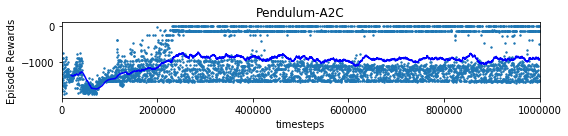

CPU times: user 27min 33s, sys: 3min 16s, total: 30min 49s
Wall time: 24min 3s


In [2]:
%%time
envname="Pendulum-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-A2C'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


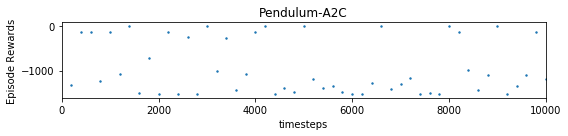

CPU times: user 13 s, sys: 1.04 s, total: 14.1 s
Wall time: 11.7 s


In [3]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0
Track generation: 1228..1539 -> 311-tiles track
Track generation: 1297..1633 -> 336-tiles track
Track generation: 1217..1525 -> 308-tiles track
Track generation: 1050..1316 -> 266-tiles track
Track generation: 1211..1518 -> 307-tiles track
Track generation: 1283..1607 -> 324-tiles track
Track generation: 1121..1405 -> 284-tiles track
Track generation: 1052..1325 -> 273-tiles track
Track generation: 883..1115 -> 232-tiles track
Track generation: 1027..1292 -> 265-tiles track
Track generation: 1068..1339 -> 271-tiles track
Track generation: 1135..1422 -> 287-tiles track
Track generation: 1265..1585 -> 320-tiles track
Track generation: 1159..1453 -> 294-tiles track
Track generation: 1212..1519 -> 307-tiles track
Track generation: 1169..1465 -> 296-tiles track
Track generation: 1087..1363 -> 276-tiles track
Track generation: 1184..1484 -> 300-tiles track
Track generation: 1158..1452 -> 294-tiles track
Track generation: 1186..1493 -> 307-tiles track
Track generati

Track generation: 1267..1588 -> 321-tiles track
Track generation: 954..1196 -> 242-tiles track
Track generation: 1299..1628 -> 329-tiles track
Track generation: 1111..1396 -> 285-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 988..1246 -> 258-tiles track
Track generation: 1031..1295 -> 264-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1175..1477 -> 302-tiles track
Track generation: 1123..1408 -> 285-tiles track
Track generation: 993..1253 -> 260-tiles track
Track generation: 1179..1478 -> 299-tiles track
Track generation: 1217..1525 -> 308-tiles track
Track generation: 1347..1688 -> 341-tiles track
Track generation: 1176..1474 -> 298-tiles track
Track generation: 1059..1328 -> 269-tiles track
Track generation: 1192..1503 -> 311-tiles track
Track generation: 1250..1574 -> 324-tiles track
Track generation: 1017..1278 -> 261-tiles track
retry to generate track (normal if there ar

Track generation: 1075..1348 -> 273-tiles track
Track generation: 953..1201 -> 248-tiles track
Track generation: 1230..1542 -> 312-tiles track
Track generation: 1040..1310 -> 270-tiles track
Track generation: 1156..1449 -> 293-tiles track
Track generation: 1271..1593 -> 322-tiles track
Track generation: 1197..1500 -> 303-tiles track
Track generation: 1166..1461 -> 295-tiles track
Track generation: 1099..1379 -> 280-tiles track
Track generation: 1216..1524 -> 308-tiles track
Track generation: 1385..1735 -> 350-tiles track
Track generation: 1279..1603 -> 324-tiles track
Track generation: 1228..1539 -> 311-tiles track
Track generation: 1004..1263 -> 259-tiles track
Track generation: 1029..1290 -> 261-tiles track
Track generation: 1150..1441 -> 291-tiles track
Track generation: 1098..1383 -> 285-tiles track
Track generation: 1320..1662 -> 342-tiles track
Track generation: 1207..1513 -> 306-tiles track
Track generation: 1214..1522 -> 308-tiles track
Track generation: 1155..1448 -> 293-tiles

Track generation: 1190..1492 -> 302-tiles track
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1288..1615 -> 327-tiles track
Track generation: 1093..1371 -> 278-tiles track
Track generation: 1119..1403 -> 284-tiles track
Track generation: 1005..1269 -> 264-tiles track
Track generation: 1064..1340 -> 276-tiles track
Track generation: 1137..1426 -> 289-tiles track
Track generation: 1104..1394 -> 290-tiles track
Track generation: 1255..1572 -> 317-tiles track
Track generation: 1183..1489 -> 306-tiles track
Track generation: 1166..1462 -> 296-tiles track
Track generation: 1225..1535 -> 310-tiles track
Track generation: 1098..1379 -> 281-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1120..1410 -> 290-tiles track
Track generation: 1055..1322 -> 267-tiles track
Track generation: 1180..1479 -> 299-tiles track
Track generation: 1051..1318 -> 267-tiles track
Track generation: 1171..1468 -> 297-tiles track
Track generation

Track generation: 1199..1503 -> 304-tiles track
Track generation: 1084..1359 -> 275-tiles track
Track generation: 1144..1434 -> 290-tiles track
Track generation: 1202..1506 -> 304-tiles track
Track generation: 1087..1363 -> 276-tiles track
Track generation: 1023..1283 -> 260-tiles track
Track generation: 1047..1317 -> 270-tiles track
Track generation: 1127..1413 -> 286-tiles track
Track generation: 1248..1564 -> 316-tiles track
Track generation: 1276..1600 -> 324-tiles track
Track generation: 1361..1705 -> 344-tiles track
Track generation: 1245..1560 -> 315-tiles track
Track generation: 1098..1376 -> 278-tiles track
Track generation: 1215..1523 -> 308-tiles track
Track generation: 1092..1369 -> 277-tiles track
Track generation: 1207..1514 -> 307-tiles track
Track generation: 1148..1439 -> 291-tiles track
Track generation: 1108..1396 -> 288-tiles track
Track generation: 1297..1625 -> 328-tiles track
Track generation: 1009..1273 -> 264-tiles track
Track generation: 1201..1505 -> 304-tile

Track generation: 1056..1324 -> 268-tiles track
Track generation: 1079..1358 -> 279-tiles track
Track generation: 1079..1357 -> 278-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 991..1246 -> 255-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1207..1513 -> 306-tiles track
Track generation: 1021..1280 -> 259-tiles track
Track generation: 1150..1446 -> 296-tiles track
Track generation: 1186..1487 -> 301-tiles track
Track generation: 1194..1497 -> 303-tiles track
Track generation: 1414..1780 -> 366-tiles track
Track generation: 1110..1391 -> 281-tiles track
Track generation: 1129..1415 -> 286-tiles track
Track generation: 1363..1708 -> 345-tiles track
Track generation: 1171..1468 -> 297-tiles track
Track generation: 1194..1496 -> 302-tiles track
Track generation: 1108..1391 -> 283-tiles track
Track generation: 1143..1433 -> 290-tiles track
Track generation: 1176..1474 -> 298-tiles

Track generation: 1060..1329 -> 269-tiles track
Track generation: 1110..1392 -> 282-tiles track
Track generation: 1159..1453 -> 294-tiles track
Track generation: 1002..1261 -> 259-tiles track
Track generation: 978..1234 -> 256-tiles track
Track generation: 987..1241 -> 254-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1191..1494 -> 303-tiles track
Track generation: 1199..1503 -> 304-tiles track
Track generation: 1059..1328 -> 269-tiles track
Track generation: 1116..1399 -> 283-tiles track
Track generation: 1202..1506 -> 304-tiles track
Track generation: 1228..1544 -> 316-tiles track
Track generation: 1100..1379 -> 279-tiles track
Track generation: 1217..1525 -> 308-tiles track
Track generation: 1093..1371 -> 278-tiles track
Track generation: 1216..1524 -> 308-tiles track
Track generation: 958..1207 -> 249-tiles track
Track generation: 1189..1491 -> 302-tiles track
Track generation: 1063..1338 -> 275-tiles track
Track generation: 1

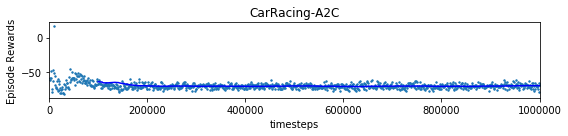

CPU times: user 10h 21min 59s, sys: 21min 57s, total: 10h 43min 56s
Wall time: 6h 38min 26s


In [4]:
%%time
envname="CarRacing-v0"
env = gym.make(envname)
exp_name=env.spec._env_name+'-A2C'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


Track generation: 1212..1519 -> 307-tiles track
Track generation: 1158..1452 -> 294-tiles track
Track generation: 1237..1550 -> 313-tiles track
Track generation: 1015..1280 -> 265-tiles track
Track generation: 1080..1352 -> 272-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1215..1522 -> 307-tiles track
Track generation: 940..1182 -> 242-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1209..1515 -> 306-tiles track
Track generation: 1224..1534 -> 310-tiles track
Track generation: 1112..1394 -> 282-tiles track
Track generation: 1169..1470 -> 301-tiles track
Track generation: 1196..1499 -> 303-tiles track
Track generation: 1241..1555 -> 314-tiles track


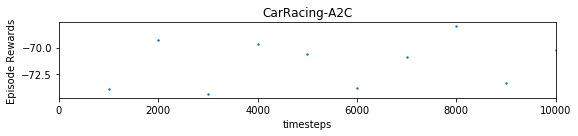

CPU times: user 2min 51s, sys: 6.41 s, total: 2min 57s
Wall time: 3min 9s


In [5]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


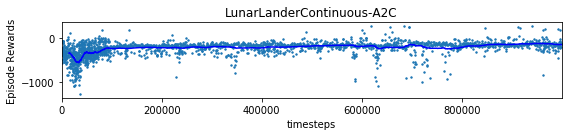

CPU times: user 1h 12min 3s, sys: 4min 22s, total: 1h 16min 25s
Wall time: 4h 49min 56s


In [6]:
%%time
envname="LunarLanderContinuous-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-A2C'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


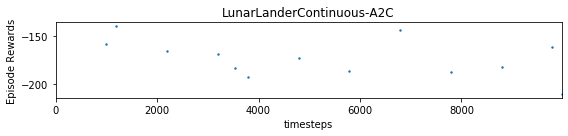

CPU times: user 27.4 s, sys: 903 ms, total: 28.3 s
Wall time: 26.4 s


In [7]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


time_steps_todo: 1000000.0


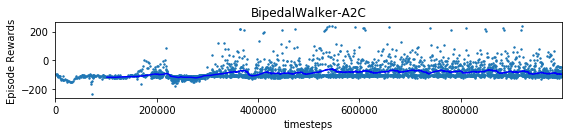

CPU times: user 23min 36s, sys: 1min 45s, total: 25min 21s
Wall time: 28min 33s


In [8]:
%%time
envname="BipedalWalker-v2"
env = gym.make(envname)
exp_name=env.spec._env_name+'-A2C'

#train
log_dir='logs_train/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C(MlpPolicy, env, verbose=0)

print("time_steps_todo: "+str(time_steps))
model.learn(total_timesteps=int(time_steps))

os.makedirs("models", exist_ok=True)
model.save("models/"+log_dir.split("/")[1])

copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()


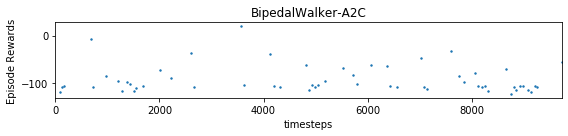

CPU times: user 11.4 s, sys: 639 ms, total: 12 s
Wall time: 9.53 s


In [9]:
%%time
#test

env = gym.make(envname)
log_dir='logs_test/'+exp_name
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv([lambda: env])

model = A2C.load("models/"+log_dir.split("/")[1])
obs = env.reset()
for i in range(time_steps_test):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    
copyfile(log_dir+".monitor.csv", "logs_tmp/tmp.monitor.csv")
results_plotter.plot_results(["logs_tmp"], time_steps, results_plotter.X_TIMESTEPS, log_dir.split("/")[1])
plt.show()
